In [206]:
# import paclages
from sklearn.neighbors import KNeighborsClassifier

clear data

In [207]:
x = [[3],[2], [1], [0]]
y = [1,1,0,0]

In [208]:
estimator = KNeighborsClassifier(n_neighbors=2) # 2 neighbors
# use fit method (estomator.fit to train the data)
estimator.fit (x,y)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [209]:
#estimate other calues
ret = estimator.predict([[0.5]])
print(ret)

[0]


## Different distances
1. Euclidean Distance
2. Manhattan Distance
    (or city clock distance)  
    for 2-dimension, $d_{12} = |x_1 - x_2| + |y_1 - y_2|$  
    In n-dimension, a $(x_{11}, x_{12}, .... , x_{1n})$ and b $(x_{21}, x_{22}, ... , x_{2n})$ the Manhattan distance is 
    $$d_{12} = \sum_{k=1}^n |x_{1k} - x_{2k}|$$

3. Chebyshev Distance   
    (or chessboard distance).
    It calculates the minimum number of moves a king in chess needs to go from one square to another.   
    for 2-dimension, $d_{12} = max(|x_1 - x_2| + |y_1 - y_2|) $ 
    In n-dimension, a $(x_{11}, x_{12}, .... , x_{1n})$ and b $(x_{21}, x_{22}, ... , x_{2n})$ the Chebtchev distance is 
    $$d_{12} = max( |x_{1k} - x_{2k}| )$$


## Selecting Proper k-value
If k value is too small, the influence of abnormal points could be significant.
If k value is too large, 

## test

# Import dataset


In [210]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [211]:
data = pd.read_csv('Cancer_Data.csv')
data.drop(columns = data.columns[-1], inplace = True)

In [212]:
# The data is categorized into two categories: Malignant and Benign
# This is summarized in the table as "diagnosis" column

# The "diagnosis" column is thus the target
y = data["diagnosis"]
# characteristics -- everything other than id and diagnosis result
X = data.iloc[:,2:]

## Split the data

In [213]:
# Some data are used as training data, while others are used as testing data
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   # 20% of the data is used for test, 80% used as training data

In [215]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [216]:
# use the training data to train the model
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [217]:
# use the knn method to predict
y_predict = knn.predict(X_test)

In [218]:
y_predict

array(['M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M'], dtype=object)

In [219]:
# Print Accuracy
print ("Training Accuracy:", knn.score(X_train, y_train))
print ("Testing  Accuracy:", knn.score(X_test, y_test))

Training Accuracy: 0.9516483516483516
Testing  Accuracy: 0.9298245614035088


## Predict Evaluation

In [220]:
confusion_matrix = confusion_matrix (y_test, y_predict)
print (confusion_matrix)

[[70  1]
 [ 7 36]]


In [221]:
print (classification_report (y_test, y_predict))

              precision    recall  f1-score   support

           B       0.91      0.99      0.95        71
           M       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



## choose the best K value

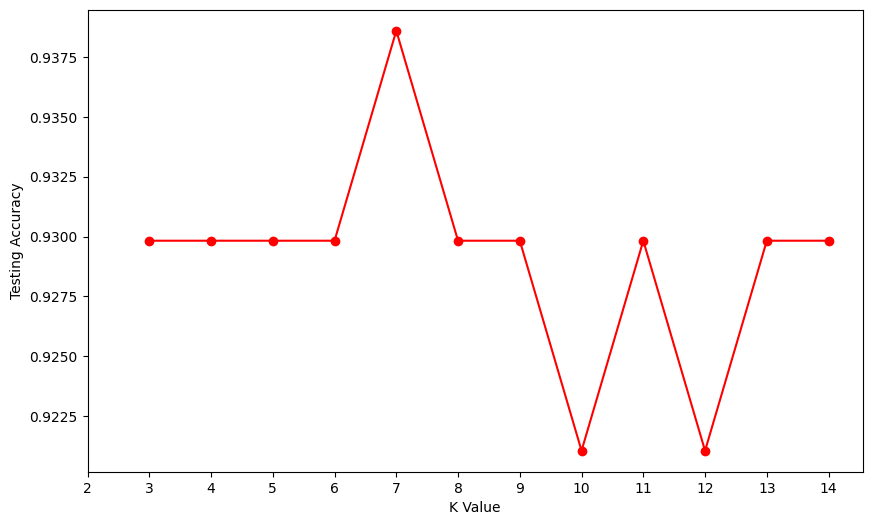

In [222]:
score_k =[]

for k in range (3, 15):
    knn_k =KNeighborsClassifier (n_neighbors =k)
    knn_k.fit (X_train, y_train)
    y_pred_k = knn_k.predict (X_test)
    score_list = []
    for i in range(100):
        score_list.append(knn_k.score(X_test, y_test))
    #score = knn_k.score(X_test, y_test)
    score_k.append (sum(score_list)/len(score_list))

#Ploting predict accuracy with different K value 
plt.figure(figsize=(10,6))
plt.plot(range(3,15), score_k,marker='o',color = 'red')
plt.xlabel ('K Value')
plt.ylabel ('Testing Accuracy')
plt.xticks (range (2,15,1))
plt.show()

  

# Test own class of code for K Nearest Neighbors.


# 

In [223]:
from KNN_personalized import KNNClassifier, KNNRegressor

Now do the exact same things as above using own code. Try with default (Euclidean distance first)

In [224]:
knn = KNNClassifier(n_neighbors=5)
# use the training data to train the model
knn.fit(X_train, y_train)
# use the knn method to predict
y_predict = knn.predict(X_test)
# Print Accuracy
print ("Training Accuracy:", knn.score(X_train, y_train))
print ("Testing  Accuracy:", knn.score(X_test, y_test))

Training Accuracy: 0.9516483516483516
Testing  Accuracy: 0.9298245614035088


The result using Euclidean distance is exactly the same as with sklearn.KNeighborsClassifier package.
Now try with other distance calculation methods:   

#### "manhattan"

In [225]:
knn = KNNClassifier(n_neighbors=5, metric = 'manhattan')
# use the training data to train the model
knn.fit(X_train, y_train)
# use the knn method to predict
y_predict = knn.predict(X_test)
# Print Accuracy
print ("Training Accuracy:", knn.score(X_train, y_train))
print ("Testing  Accuracy:", knn.score(X_test, y_test))

Training Accuracy: 0.9560439560439561
Testing  Accuracy: 0.9298245614035088


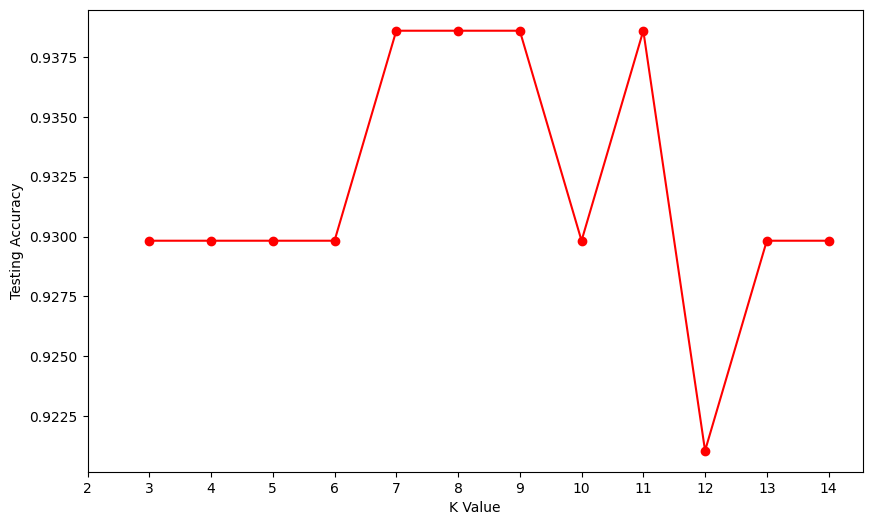

In [226]:
# use different K values to predict, evaluate the prediction accuracy, then choose K value.
# put all accurancy values into a list 
score_k =[]

for k in range (3, 15):
    knn_k =KNNClassifier (n_neighbors =k, metric= 'manhattan')
    knn_k.fit (X_train, y_train)
    y_pred_k = knn_k.predict (X_test)
    score_list = []
    for i in range(100):
        score_list.append(knn_k.score(X_test, y_test))
    #score = knn_k.score(X_test, y_test)
    score_k.append (sum(score_list)/len(score_list))

#Ploting predict accuracy with different K value 
plt.figure(figsize=(10,6))
plt.plot(range(3,15), score_k,marker='o',color = 'red')
plt.xlabel ('K Value')
plt.ylabel ('Testing Accuracy')
plt.xticks (range (2,15,1))
plt.show()